In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Load the Sample Dataset

In [76]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [77]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Sampling Techniques

### Sampling Random Sampling

In [78]:
df.shape

(150, 5)

In [79]:
df.sample(5,random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [80]:
n = int(input("Enter your sample : "))
print(n)

sample_data = df.sample(n, random_state=42)
print("Simple Radom Sampling : ")
sample_data

5
Simple Radom Sampling : 


,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


## Systematic Sampling

In [81]:
n = int(input("Enter your samples : "))
print()

sample_data = df.iloc[::n]
print("Systematic Sampling : ")
sample_data


Systematic Sampling : 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
50,7.0,3.2,4.7,1.4,versicolor
60,5.0,2.0,3.5,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
80,5.5,2.4,3.8,1.1,versicolor
90,5.5,2.6,4.4,1.2,versicolor


## Startfied Sampling

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [84]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [85]:
strata = df.groupby('species')
strata

In [86]:
strata = df.groupby('species').apply(lambda x:x.sample(min(len(x), 3)))
strata

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     40            5.0          3.5           1.3          0.3   
           1             4.9          3.0           1.4          0.2   
           41            4.5          2.3           1.3          0.3   
versicolor 55            5.7          2.8           4.5          1.3   
           89            5.5          2.5           4.0          1.3   
           79            5.7          2.6           3.5          1.0   
virginica  122           7.7          2.8           6.7          2.0   
           103           6.3          2.9           5.6          1.8   
           142           5.8          2.7           5.1          1.9   

                   species  
species                     
setosa     40       setosa  
           1        setosa  
           41       setosa  
versicolor 55   versicolor  
           89   versicolor  
           79   versicolor  
virginica  122   virginica  
           103   virginica  
           142   virginica

In [87]:
strata = df.groupby('species', group_keys=False).apply(lambda x : x.sample(min(len(x), 3)))
strata

,sepal_length,sepal_width,petal_length,petal_width,species
36,5.5,3.5,1.3,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
79,5.7,2.6,3.5,1.0,versicolor
75,6.6,3.0,4.4,1.4,versicolor
83,6.0,2.7,5.1,1.6,versicolor
113,5.7,2.5,5.0,2.0,virginica
136,6.3,3.4,5.6,2.4,virginica
138,6.0,3.0,4.8,1.8,virginica


## Cluster Sampling

In [88]:
clusters = df.species.unique()
clusters

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [89]:
clusters = df.species.unique()

data = pd.concat(df[df['species'] == i].sample(3) for i in np.random.choice(clusters, size=2, replace=False))
data

,sepal_length,sepal_width,petal_length,petal_width,species
18,5.7,3.8,1.7,0.3,setosa
17,5.1,3.5,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
132,6.4,2.8,5.6,2.2,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


# Quantiles - (Quartiles, Pentile, Decile, Percentile)

In [90]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [91]:
# Quartiles

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [92]:
# Pentiles
df.describe(percentiles=[0.2,0.4,0.6,0.8,1.0])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
60%,6.100000,3.100000,4.640000,1.500000
80%,6.520000,3.400000,5.320000,1.900000
100%,7.900000,4.400000,6.900000,2.500000


In [93]:
df.describe(percentiles=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0))


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
20%,5.000000,2.700000,1.500000,0.200000
30%,5.270000,2.800000,1.700000,0.400000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
60%,6.100000,3.100000,4.640000,1.500000


In [94]:
df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [95]:
df['sepal_length'].quantile(0.25)

5.1

In [96]:
df['sepal_length'].quantile(0.5)

5.8

# Outlier Detection

## Using Boxplot

<Axes: >

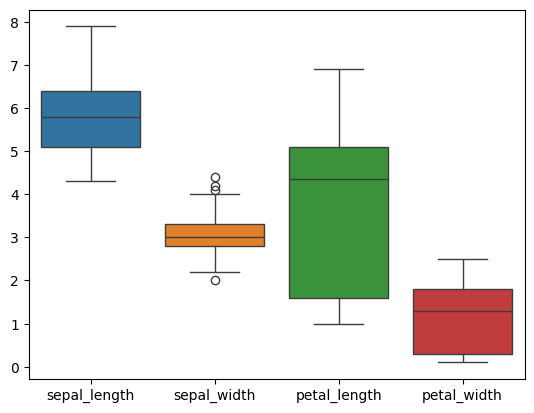

In [97]:
sns.boxplot(df)

<Axes: ylabel='sepal_width'>

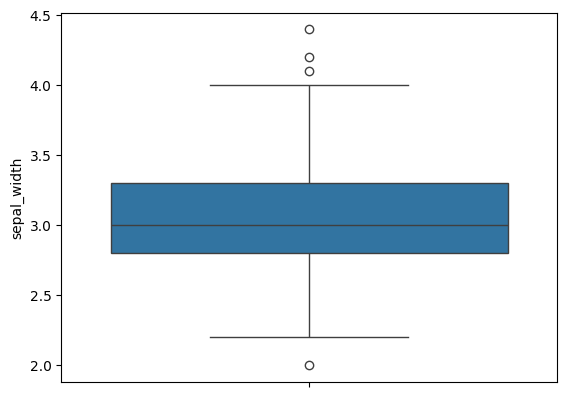

In [98]:
sns.boxplot(df['sepal_width'])

In [99]:
df[(df['sepal_width'] > 4.05) | df['sepal_width'] < 2.05]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Using IQR (Inter-Quartile Range)

In [100]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)

IQR = Q3 - Q1
print(f'IQR : {IQR}')

# Define Your Lower and Upper Limit

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = [x for x in df['sepal_width'] if x < lower_limit or x > upper_limit]

print(f"Lower limit for Outliers  : {lower_limit}")
print(f"Upper limit for Outliers  : {upper_limit}")
print(f"Identified Outliers  : {outliers}")

IQR : 0.5
Lower limit for Outliers  : 2.05
Upper limit for Outliers  : 4.05
Identified Outliers  : [4.4, 4.1, 4.2, 2.0]


In [101]:
print(Q1)
print(Q3)
print(IQR)

2.8
3.3
0.5


In [102]:
df[(df['sepal_width'] > 4.05) | (df['sepal_width']< 2.05)].index


Index([15, 32, 33, 60], dtype='int64')

In [103]:
df.shape

(150, 5)

In [104]:
df.drop(index = [15,32,33,60], axis=0, inplace=True)

In [105]:
df.shape

(146, 5)

<Axes: ylabel='sepal_length'>

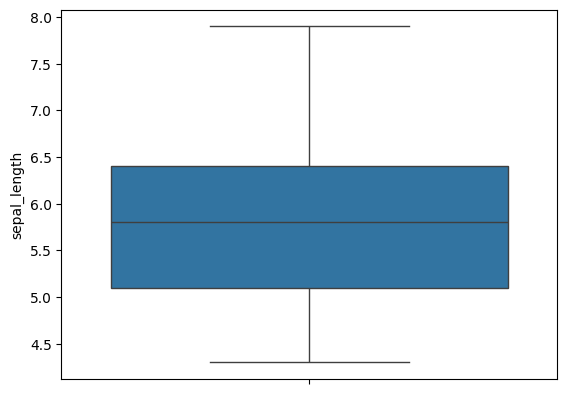

In [106]:
sns.boxplot(df['sepal_length'])

In [107]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Distribution Plot (Handling Missing Data )

In [108]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [109]:
import warnings
warnings.filterwarnings('ignore')

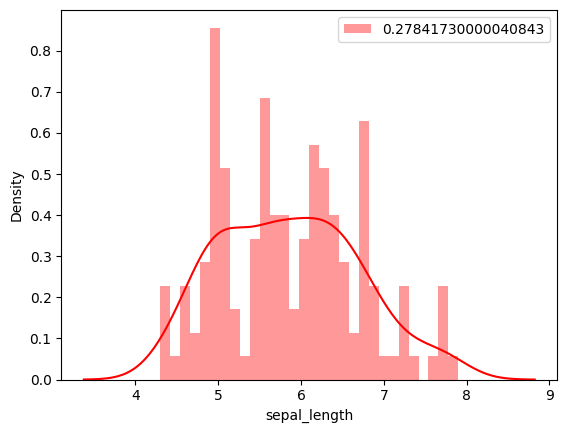

In [110]:
sns.distplot(df['sepal_length'], bins = 30, color="r", label=df['sepal_length'].skew())
plt.legend()
plt.show()

In [111]:
df['sepal_length'].median()

5.8

In [112]:
df['sepal_length'].mode()

0    5.0
1    5.1
2    6.3
Name: sepal_length, dtype: float64

In [113]:
# Code to fill missing value

df['sepal_length'].fillna(df['sepal_length'].mean(), inplace=True)

# Duplicate Data

In [114]:
df.duplicated().sum()

1

In [115]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [116]:
df.shape

(146, 5)

In [117]:
df.drop_duplicates(keep='first', inplace=True)

In [118]:
df.shape

(145, 5)

In [119]:
df.duplicated().sum()

0

In [120]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


# Correlation Matrix - For Featuure Selection and Multi- Collinearity

In [121]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [122]:
species = df['species']

In [123]:
df = df.drop('species', axis=1)

In [124]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.123866,0.881381,0.825321
sepal_width,-0.123866,1.000000,-0.403554,-0.337080
petal_length,0.881381,-0.403554,1.000000,0.961776
petal_width,0.825321,-0.337080,0.961776,1.000000


<Axes: >

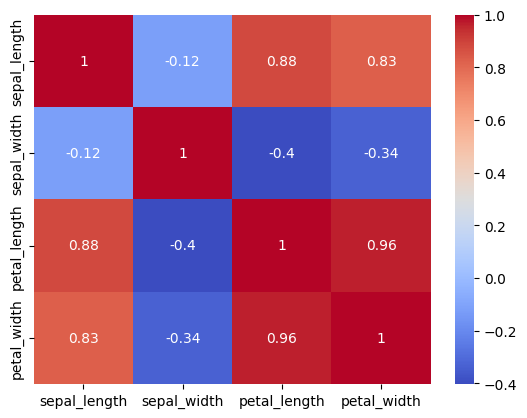

In [125]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [126]:
# For Feature Selection

In [127]:
df = df.assign(species=species)

In [128]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [129]:
df['species'].value_counts()

species
versicolor    49
virginica     49
setosa        47
Name: count, dtype: int64

In [130]:
df['species'] = df['species'].map({
    'setosa' : 0, 'versicolor' : 1, 'virginica' : 2
})

In [131]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [132]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.123866,0.881381,0.825321,0.792591
sepal_width,-0.123866,1.000000,-0.403554,-0.337080,-0.401283
petal_length,0.881381,-0.403554,1.000000,0.961776,0.947849
petal_width,0.825321,-0.337080,0.961776,1.000000,0.955615
species,0.792591,-0.401283,0.947849,0.955615,1.000000


<Axes: >

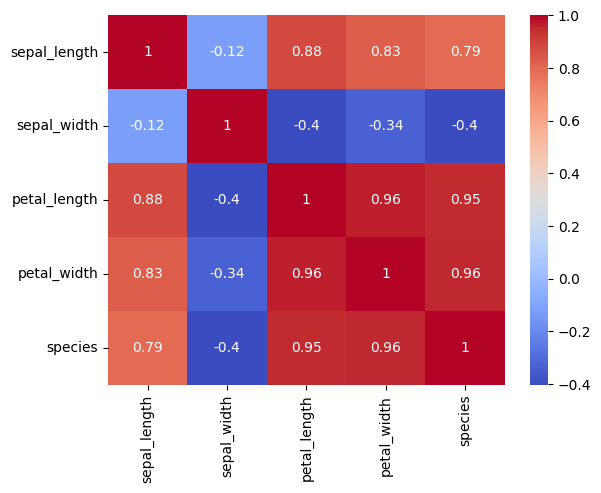

In [133]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [134]:
df.corr()['species']

sepal_length    0.792591
sepal_width    -0.401283
petal_length    0.947849
petal_width     0.955615
species         1.000000
Name: species, dtype: float64

# Confidence Interval   

# CI = X' += z. S/√n

## x' = Mean Value
## += -  Lower/Upper Limit
## z = z-value for the confidence level
## S = Standard deviation
## √n = Sample Size

In [136]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [137]:
df['sepal_length' ]  #Population

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 145, dtype: float64

In [138]:
# Sample Data

n= 40 
sample = df.sample(n, random_state=42)
sample

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
145,6.7,3.0,5.2,2.3,2
28,5.2,3.4,1.4,0.2,0
20,5.4,3.4,1.7,0.2,0
45,4.8,3.0,1.4,0.3,0
121,5.6,2.8,4.9,2.0,2
130,7.4,2.8,6.1,1.9,2
112,6.8,3.0,5.5,2.1,2
88,5.6,3.0,4.1,1.3,1
19,5.1,3.8,1.5,0.3,0


In [139]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 145, dtype: float64

In [140]:
sample['sepal_length']

73     6.1
145    6.7
28     5.2
20     5.4
45     4.8
121    5.6
130    7.4
112    6.8
88     5.6
19     5.1
12     4.8
58     6.6
132    6.4
82     5.8
77     6.7
39     5.1
116    6.5
137    6.4
104    6.5
105    7.6
98     5.1
140    6.7
11     4.8
70     5.9
34     4.9
48     5.3
54     6.5
80     5.5
115    6.4
9      4.9
4      5.0
27     5.2
124    6.7
129    7.2
17     5.1
10     5.4
122    7.7
64     5.6
71     6.1
102    7.1
Name: sepal_length, dtype: float64

In [141]:
sample['sepal_length'].mean()

5.955

In [142]:
# Confidence Interval

sample_size = len(sample)
sample_mean = np.mean(sample['sepal_length'])
sample_std = np.std(sample['sepal_length'])
confidence_level = 0.95  # 95%
critical_value = 1.96


print(f'Sample size : {sample_size}')
print(f'Sample Mean : {sample_mean}')
print(f'Sample Std : {sample_std}')
print(f'Confidence Level : {confidence_level}')

Sample size : 40
Sample Mean : 5.955
Sample Std : 0.8431933348882688
Confidence Level : 0.95


# Confidence Interval   

# CI = X' += z. S/√n

## x' = Mean Value
## += -  Lower/Upper Limit
## z = z-value for the confidence level
## S = Standard deviation
## √n = Sample Size

In [145]:
margin_of_error = 1.96 * (sample_std / np.sqrt(sample_size))

lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error


print(f'Confidence Level for the Sepal Length at {confidence_level * 100 } % confidence : ')
print()

print(f'Lower Limit : {lower_limit}')
print(f'Upper Limit : {upper_limit}')
print(f'Margin Of Error  : {margin_of_error}')
print(f'Population Mean : {np.mean(df.sepal_length)}')
print('\n')

if sample_mean > lower_limit and sample_mean < upper_limit : 
    print(f'Assumption are true for Population based on Sample Data. ')
else:
    print("Assumption are false for Population based on Sample Data. ")

Confidence Level for the Sepal Length at 95.0 % confidence : 

Lower Limit : 5.693691678280236
Upper Limit : 6.216308321719764
Margin Of Error  : 0.26130832171976465
Population Mean : 5.857241379310344


Assumption are true for Population based on Sample Data. 


In [147]:
def confidence_level() :

    sample_size = len(sample)
    sample_mean = np.mean(sample['sepal_length'])
    sample_std = np.std(sample['sepal_length'])
    confidence_level = 0.95  # 95%
    critical_value = 1.96

    print(f'Sample Size :  {sample_size}')
    print(f'Sample Mean :  {sample_mean}')
    print(f'Sample Std :  {sample_std}')
    print(f'Confidence Level :  {critical_value}')
    print()


    margin_of_error = 1.96 * (sample_std/ np.sqrt(sample_size))

    lower_limit = sample_mean - margin_of_error
    upper_limit = sample_mean + margin_of_error


    print(f'Confidence Level for the Sepal length at {confidence_level * 100} % confidence : ')

    print(f'Lower Limit : {lower_limit}')
    print(f'Upper Limit : {upper_limit}')
    print(f'Margin Of Error :  {margin_of_error}')
    print(f'Population Mean : {np.mean(df.sepal_length)}')
    print(f"Sample Mean : {sample_mean}")
    print('\n')

    if sample_mean  > lower_limit and sample_mean < upper_limit : 
        print(f'Assumption are true for Population based on Sample Data. ')
    else:
        print(f'Assumption are false for Population based on Sample Data. ')


confidence_level() 



Sample Size :  40
Sample Mean :  5.955
Sample Std :  0.8431933348882688
Confidence Level :  1.96

Confidence Level for the Sepal length at 95.0 % confidence : 
Lower Limit : 5.693691678280236
Upper Limit : 6.216308321719764
Margin Of Error :  0.26130832171976465
Population Mean : 5.857241379310344
Sample Mean : 5.955


Assumption are true for Population based on Sample Data. 


# Hypotheses Testing - (T-test)

In [148]:
from scipy import stats

In [152]:
#Sample Salary data for two companies (replace with your actual data)

wipro = [50000,55000,60000,52000,58000]
infosys = [52000,54000,58000,59000,61000]

# Perform T-test
t_stat, p_value = stats.ttest_ind(wipro, infosys)

# Print Result

print("T-statistic : " , t_stat)
print("P-value : " , p_value)

# Interpret Result
alpha = 0.05 # Significance level

if p_value > alpha :
    print("Reject the null hypothesis : There is a significant difference in mean salaries.")
else:
    print("Accept the null hypothesis : There is no significant difference in mean salaries.")
    


T-statistic :  -0.7264208810441355
P-value :  0.48828740121731584
Reject the null hypothesis : There is a significant difference in mean salaries.


In [153]:
wipro = [50000,55000,60000,52000,58000]
infosys = [52000,54000,58000,61000]


In [154]:
np.mean(wipro)

55000.0

In [155]:
np.mean(infosys)

56250.0

In [156]:
from scipy import stats

In [157]:
#Sample Salary data for two companies (replace with your actual data)

wipro = [10000,35000,20000,12000,18000]
infosys = [52000,54000,58000,59000,61000]

# Perform T-test
t_stat, p_value = stats.ttest_ind(wipro, infosys)

# Print Result

print("T-statistic : " , t_stat)
print("P-value : " , p_value)

# Interpret Result
alpha = 0.05 # Significance level

if p_value > alpha :
    print("Reject the null hypothesis : There is a significant difference in mean salaries.")
else:
    print("Accept the null hypothesis : There is no significant difference in mean salaries.")
    


T-statistic :  -8.033466584598061
P-value :  4.2375005614596394e-05
Accept the null hypothesis : There is no significant difference in mean salaries.


In [158]:
0.0000042375 < 0.05

True

In [160]:
np.mean([10000,35000,20000,12000,18000])  #Wipro

19000.0

In [161]:
np.mean([52000,54000,58000,59000,61000])  # Infosys

56800.0